In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

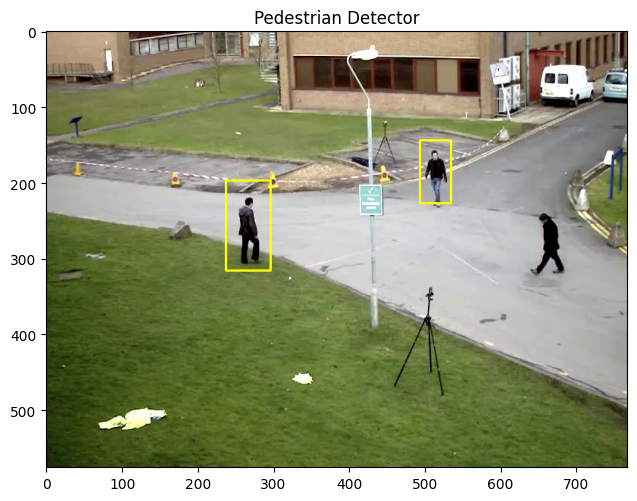

In [ ]:
cap = cv2.VideoCapture('walking.mp4')

body_classifier = cv2.CascadeClassifier('haarcascade_fullbody.xml')

ret, frame = cap.read()

if ret: 
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    bodies = body_classifier.detectMultiScale(gray, 1.2, 3)
    
    for (x,y,w,h) in bodies:
          
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)

        
cap.release()   
imshow("Pedestrian Detector", frame)

In [6]:
cap = cv2.VideoCapture('walking.mp4')

w = int(cap.get(3))
h = int(cap.get(4))

out = cv2.VideoWriter('walking_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'),30,(w,h))

body_classifier = cv2.CascadeClassifier('haarcascade_fullbody.xml')

while(True):
    ret,frame = cap.read()
    if ret : 
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        bodies = body_classifier.detectMultiScale(gray, 1.2, 3)
        for (x,y,w,h) in bodies:
          
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)


        out.write(frame)
    else:
            break
    

cap.release()
out.release()
#check the folder